In [320]:

import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from datetime import date
import seaborn as sns


In [321]:
with open("raw_tables_2023_03_05/raw_tweets", "rb") as raw_timeline_file:
    tweet_df = pd.read_pickle(raw_timeline_file)
    # tweet_df.to_csv('raw_tweets_out.csv')


In [322]:
with open("raw_tables_2023_03_05/raw_user_profiles", "rb") as raw_timeline_file:
    user_df = pd.read_pickle(raw_timeline_file)
    # user_df.to_csv('raw_user_out.csv')
    

In [323]:
tweet_df.columns

Index(['id', 'url', 'user_name', 'content', 'creation_date', 'reply_count',
       'retweet_count', 'like_count', 'quote_count', 'view_count',
       'conversation_id', 'language', 'source', 'source_url', 'source_label',
       'links', 'media_types', 'reply_tweet_id', 'reply_user_name', 'hashtags',
       'cashtags', 'vibe_text', 'context_id', 'context_url',
       'context_user_name', 'context_content', 'context_creation_date',
       'context_reply_count', 'context_retweet_count', 'context_like_count',
       'context_quote_count', 'context_view_count', 'context_conversation_id',
       'context_language', 'context_source', 'context_source_url',
       'context_source_label', 'context_links', 'context_media_types',
       'context_reply_tweet_id', 'context_reply_user_name', 'context_hashtags',
       'context_cashtags', 'context_vibe_text', 'context_types'],
      dtype='object')

In [324]:
user_df.columns

Index(['user_name', 'display_name', 'description', 'description_links',
       'verification_status', 'creation_date', 'followers_count',
       'friends_count', 'statuses_count', 'favourites_count', 'listed_count',
       'media_count', 'location', 'protection_status', 'link'],
      dtype='object')

## Q.3
Are they equally active in using the Twitter platform to express their views?

No, There are a bunch of senators extremely active on Twitter, but majority of them have tweets between 0-5k


In [325]:
tweet_filtered = tweet_df.loc[tweet_df['reply_tweet_id'].isna()] #filter out LONG tweets that has to reply itself
total_tweets = len(tweet_filtered)
num_users = len(user_df)  # 583 == tweet_df['user_name'].nunique()


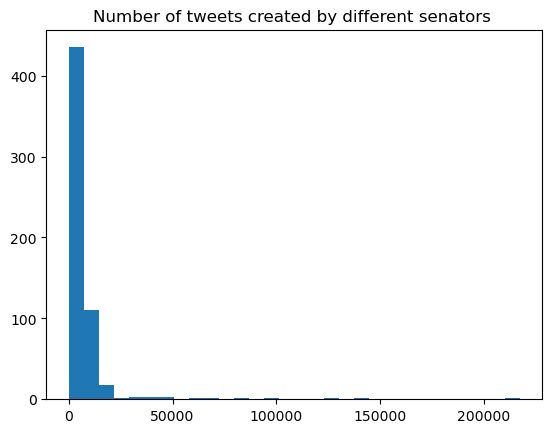

In [326]:
# Distribution of Number of tweets by different senators
plt.hist(tweet_filtered.groupby('user_name')[
         'id'].count(), density=False, bins=30);
plt.title('Number of tweets created by different senators ');


In [327]:
sortByCount = tweet_filtered.groupby('user_name')['id'].count().reset_index(
    name='count').sort_values(['count'],
                              ascending=False)  # sort user in descending order of their tweets amount
sum(sortByCount.head(int(num_users*0.1))
    ['count'])/total_tweets  # top 10% of senators created half of total tweets


0.4760794101648444

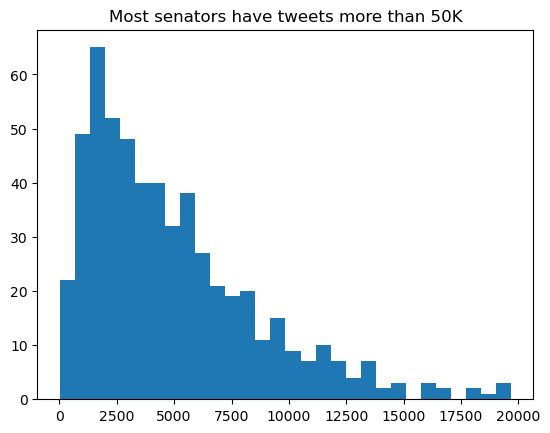

In [328]:
# Majority of senator have tweets around 2K.
plt.hist(sortByCount[sortByCount['count'] < 20000]
         ['count'], density=False, bins=30);
plt.title('Most senators have tweets more than 50K');


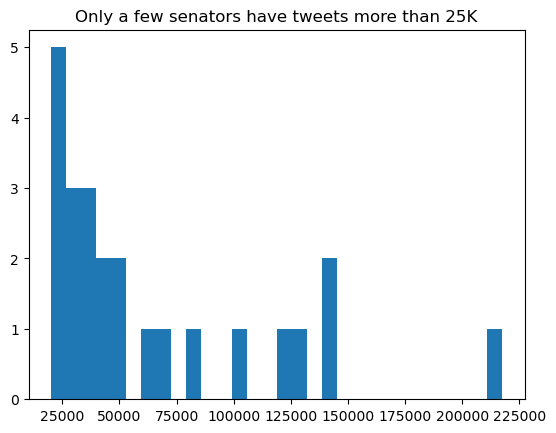

In [329]:
# There are a bunch of senators extremely active on Twitter
plt.hist(sortByCount[sortByCount['count'] >= 20000]['count'], density=False, bins=30);
plt.title('Only a few senators have tweets more than 25K') ;


In [330]:
# statistics of the Number of tweets by different senators
pd.options.display.float_format = '{:,.0f}'.format
sortByCount['count'].describe()


count       583
mean      7,395
std      16,124
min          25
25%       2,133
50%       4,301
75%       7,324
max     217,392
Name: count, dtype: float64

## Q4. Do they have similar number of followers? What does the distribution of follow count look like?

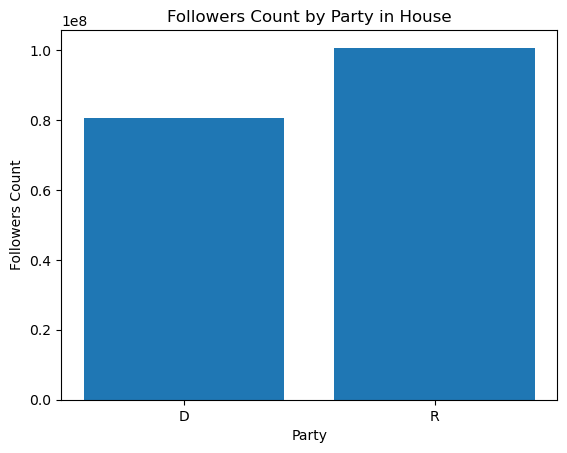

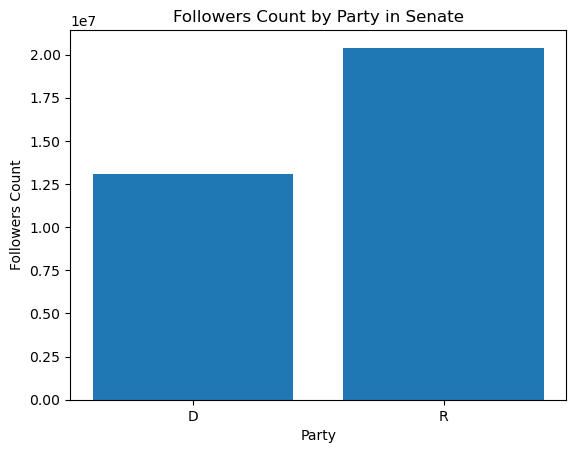

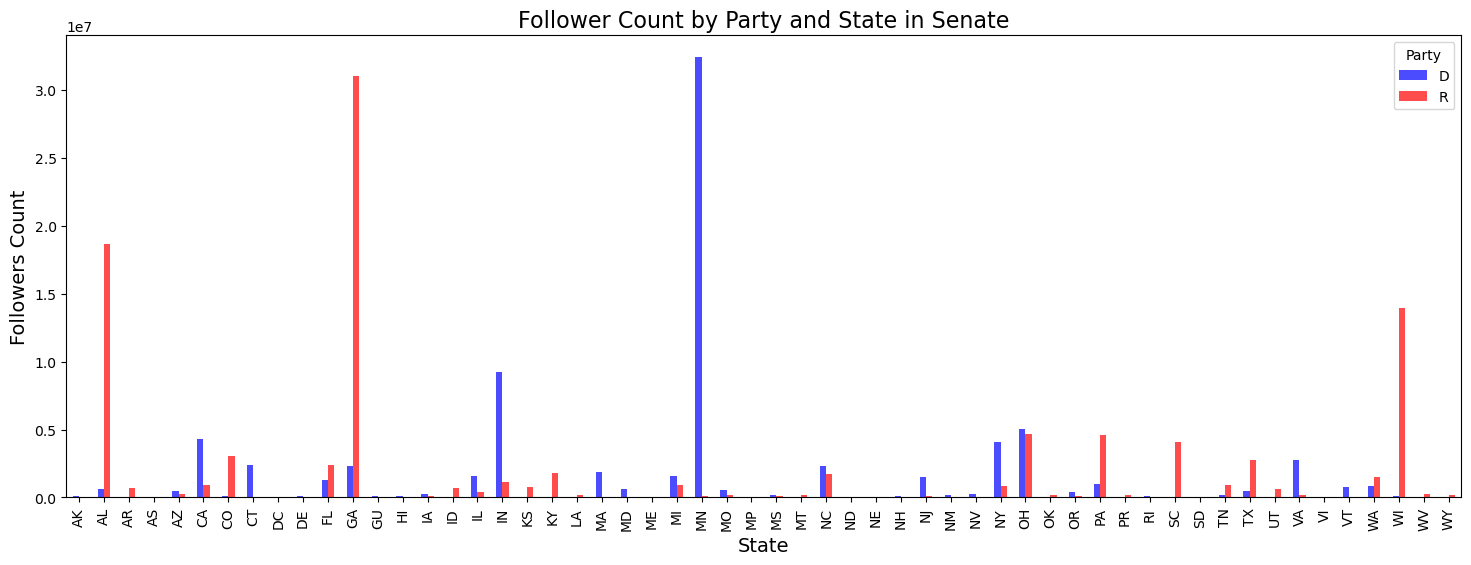

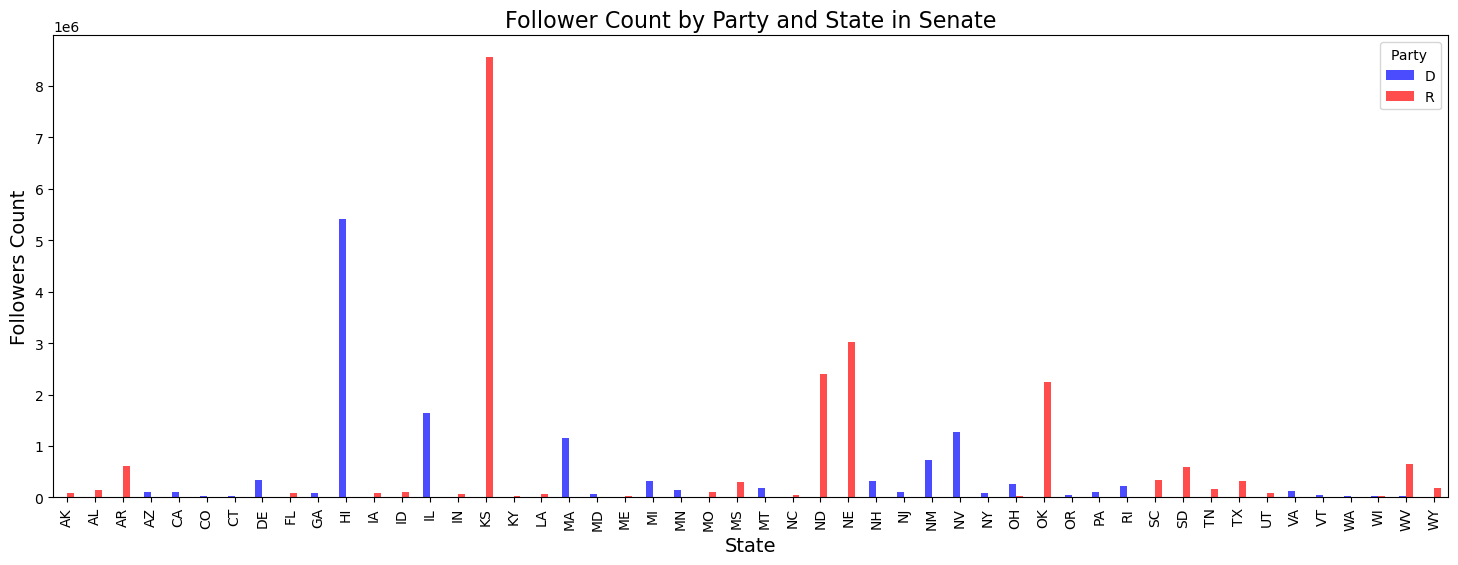

In [196]:
house_csv_path = '../../data/congress_twitter_117th_house.csv'
senate_csv_path = '../../data/congress_twitter_117th_senate.csv'

house_df = pd.read_csv(house_csv_path)
senate_df = pd.read_csv(senate_csv_path)

# Create the first bar chart for the House of Representatives
house_user_follower_state_df = user_df.join(house_df).groupby(['State', 'Party']).agg(followers_count=("followers_count", "sum"))
house_user_follower_df = house_user_follower_state_df.groupby(['Party']).agg(followers_count=("followers_count", "sum"))

plt.figure(1)
plt.bar(house_user_follower_df.index, house_user_follower_df['followers_count'])
plt.xlabel('Party')
plt.ylabel('Followers Count')
plt.title('Followers Count by Party in House')

# Create the second bar chart for the Senate
filter_senate_df = senate_df[senate_df['Party '] != 'I']
senate_user_follower_state_df = user_df.join(filter_senate_df).groupby(['State', 'Party ']).agg(followers_count=("followers_count", "sum"))
senate_user_follower_df = senate_user_follower_state_df.groupby(['Party ']).agg(followers_count=("followers_count", "sum"))

plt.figure(2)
plt.bar(senate_user_follower_df.index, senate_user_follower_df['followers_count'])
plt.xlabel('Party')
plt.ylabel('Followers Count')
plt.title('Followers Count by Party in Senate')

# Pivot the house_user_follower_df DataFrame to create two columns for the follower counts for each party
house_user_follower_state_pivot = house_user_follower_state_df.pivot_table(index='State', columns='Party', values='followers_count')

# Plot the follower counts for the house
house_user_follower_state_pivot.plot(kind='bar', color=['b', 'r'], alpha=0.7, figsize=(18,6))

# Set the title and labels for the house follower count chart
plt.title('Follower Count by Party and State in Senate', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Followers Count', fontsize=14)

# Pivot the senate_user_follower_df DataFrame to create two columns for the follower counts for each party
senate_user_follower_state_pivot = senate_user_follower_state_df.pivot_table(index='State', columns='Party ', values='followers_count')

# Plot the follower counts for the senate
senate_user_follower_state_pivot.plot(kind='bar', color=['b', 'r'], alpha=0.7, figsize=(18,6))

# Set the title and labels for the senate follower count chart
plt.title('Follower Count by Party and State in Senate', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Followers Count', fontsize=14)

# Show the plots
plt.show()

## Q4's answer
<font color='red'>No. It does not look like they have similar number of followers as we observe the bar chart above. </font>


## Q5. Do their tweets grab similar amount of attention from followers throughout the account history?

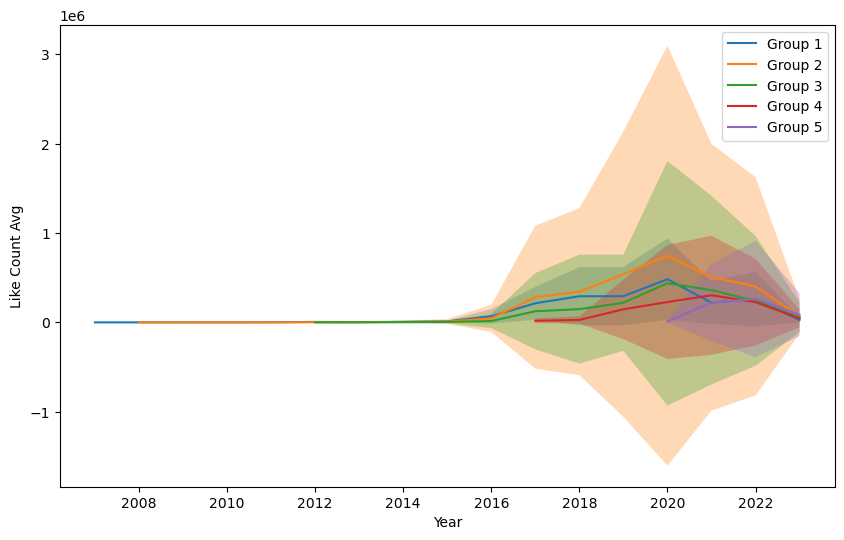

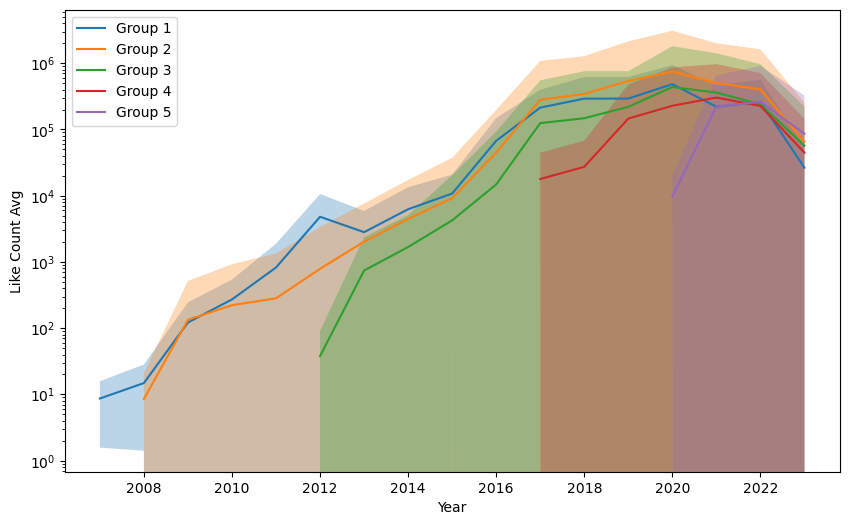

In [190]:
# extract the year from the creation_date column
tweet_df['tweet_creation_year'] = tweet_df['creation_date'].apply(lambda x: x.year)

# merge user_df with user_tweet_df
user_tweet_df = tweet_df.groupby(['user_name', 'tweet_creation_year'])['like_count'].sum().reset_index()
user_df['user_creation_year'] = user_df['creation_date'].apply(lambda x: x.year)

user_tweet_df = user_df.merge(user_tweet_df, on='user_name')

# create a new column to group the users based on creation date
bins = [2003, 2007, 2011, 2015, 2019, 2023]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

user_tweet_df['group'] = pd.cut(user_tweet_df['user_creation_year'], bins=bins, labels=labels)

# remove top 3 values for each group
grouped_df = user_tweet_df.groupby(['tweet_creation_year', 'group']).apply(lambda x: x.sort_values('like_count', ascending=False).iloc[3:]).reset_index(drop=True)

# calculate the mean, std like_count for all users in each year and group
grouped_agg_df = grouped_df.groupby(['tweet_creation_year', 'group']).agg(mean=("like_count", "mean"), std=("like_count", "std")).reset_index()

# plot the lines for each group
plt.figure(figsize=(10, 6))
for group, group_df in grouped_agg_df.groupby('group'):
    plt.plot(group_df['tweet_creation_year'], group_df['mean'], label=group)
    lower_bound = group_df['mean'] - group_df['std']
    upper_bound = group_df['mean'] + group_df['std']
    plt.fill_between(group_df['tweet_creation_year'], lower_bound, upper_bound, alpha=.3)

plt.xlabel('Year')
plt.ylabel('Like Count Avg')
plt.legend()
plt.show()

# reuse user_tweet_df dataframe and add log scale
plt.figure(figsize=(10, 6))
for group, group_df in grouped_agg_df.groupby('group'):
    plt.plot(group_df['tweet_creation_year'], group_df['mean'], label=group)
    lower_bound = group_df['mean'] - group_df['std']
    upper_bound = group_df['mean'] + group_df['std']
    plt.fill_between(group_df['tweet_creation_year'], lower_bound, upper_bound, alpha=.3)

plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Like Count Avg')
plt.legend()
plt.show()


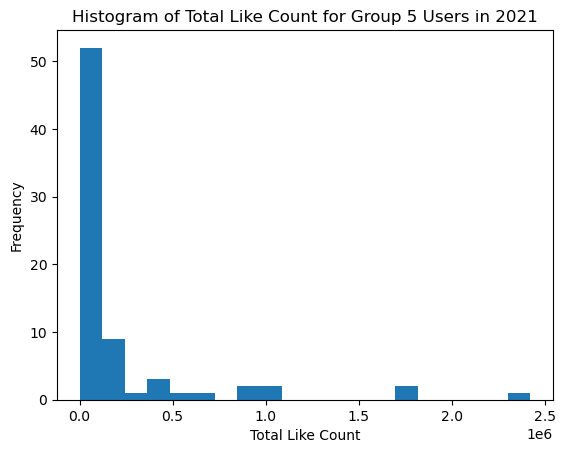

In [188]:
# filter for group 5 and year 2021
group_5_2022 = grouped_df[(grouped_df['group'] == 'Group 5') & (grouped_df['tweet_creation_year'] == 2021)]

# plot histogram of total like count for each user in group 5
plt.hist(group_5_2022['like_count'], bins=20)
plt.xlabel('Total Like Count')
plt.ylabel('Frequency')
plt.title('Histogram of Total Like Count for Group 5 Users in 2021')
plt.show()

## Q5's answer
<font color='red'>No, it doesn't seem so from the plotted data. In our analysis, we divided 584 users into 5 groups based on their joining time on Twitter. The reason for grouping is to avoid the factor of different joining times. We decided to analyze the total number of likes on their tweets (as most of the likers are their followers). In each group, we calculated the mean total likes received by all members of that group as well as their standard deviation. We can see that the standard deviation of total likes received by each group is significantly large, which means their tweets are actually receiving different levels of attention.</font>


## Q6. Do they write tweets in similar length?


In [331]:
tweet_sampled = tweet_df.sample(frac = 0.05, replace=False) #randomly sample 5% of tweets

In [332]:
pattern = re.compile('http\S+')
def get_tweet_len(tweet):
    temp = pattern.sub(r'', tweet) #remove html in the tweet
    return len(word_tokenize(temp)) #count number of tokens in a tweet

tweet_sampled['tweet_len'] = tweet_sampled['content'].map(
    lambda x: get_tweet_len(x))

In [333]:
# combine tweets length:
temp1 = tweet_sampled[~tweet_sampled['reply_tweet_id'].isna()][[ 'reply_tweet_id', 'tweet_len']]
temp1.columns = ['reply_tweet_id_temp', 'tweet_len_temp']
temp2 = temp1.groupby(['reply_tweet_id_temp']).sum().reset_index()
combinedLen = pd.merge(temp2, tweet_sampled, how='right',
                       left_on='reply_tweet_id_temp', right_on='id')
combinedLen['tweet_len_temp'] = combinedLen['tweet_len_temp'].fillna(0)
combinedLen['total_tweet_len'] = combinedLen['tweet_len_temp']+combinedLen['tweet_len']
combinedLen.drop(
    ['reply_tweet_id_temp', 'tweet_len_temp'],
    axis=1, inplace=True)


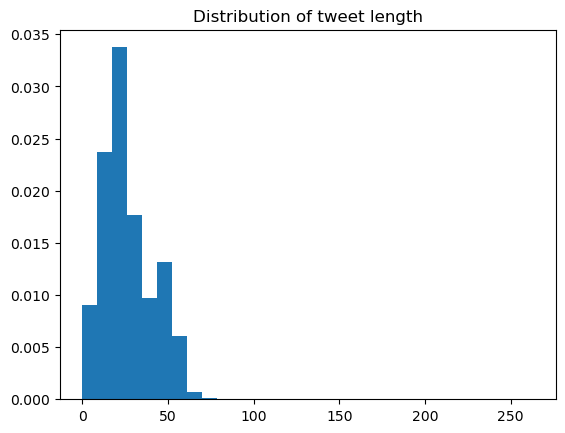

In [334]:
plt.hist(combinedLen['total_tweet_len'],density=True, bins=30);
plt.title('Distribution of tweet length');

## Q7. How many tweets do each person write in relation to the join date?


In [335]:
# calculate number of days since each senator joined Twitter
def getDays(x):
    date1 = x.date()
    date2 = date(2023, 3, 7)
    return (date2-date1).days


user_df['days_since_joined'] = user_df['creation_date'].map(
    lambda x: getDays(x))


In [336]:
days = pd.merge(sortByCount, user_df, on='user_name', how='inner')


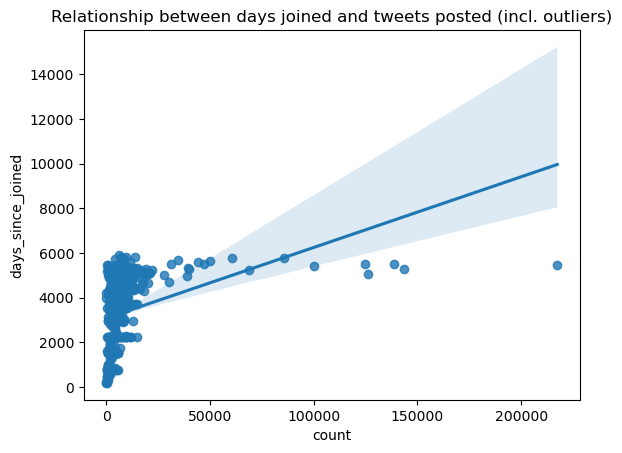

In [337]:
sns.regplot(data=days, x='count',
            y='days_since_joined', scatter=True)
plt.title('Relationship between days joined and tweets posted (incl. outliers)');


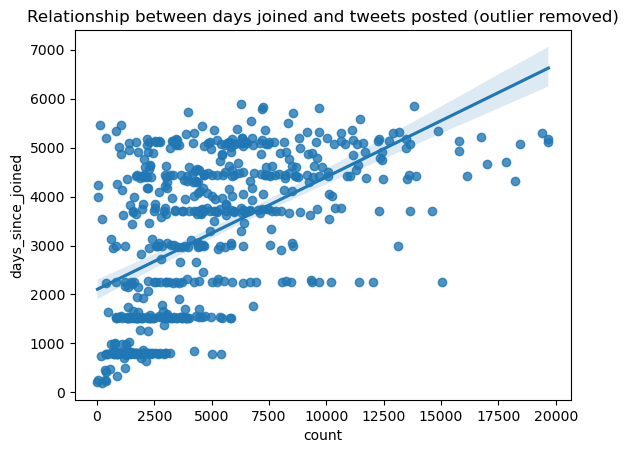

In [338]:
sns.regplot(data=days[days['count'] <=20000], x='count', y='days_since_joined', scatter=True);
plt.title('Relationship between days joined and tweets posted (outlier removed)');
